In [37]:
import os
import pandas as pd
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from tensorflow.keras import datasets, layers, models
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten, Dense, Softmax
from tensorflow.keras import optimizers
from keras.layers import Dropout
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from keras.models import Model, load_model
from keras.callbacks import TensorBoard, ModelCheckpoint

In [4]:
Image_Data="/content/drive/MyDrive/Data"
Data_Directory=os.listdir(Image_Data)
print(Data_Directory)

['with_mask', 'without_mask']


Converting the images into Grey scale image to reduce computation time used by Model

In [5]:
image_list=[]


for category in Data_Directory:
    folder_path=os.path.join(Image_Data,category)
    for image in os.listdir(folder_path):
        image_path=os.path.join(folder_path,image)
        image=cv2.imread(image_path)      
        grayscale_image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        resized_image=cv2.resize(grayscale_image,(128,128))
        image_list.append(resized_image)
       


In [65]:
labellist=[]
for category in Data_Directory:
    folder_path=os.path.join(Image_Data,category)
    for image in os.listdir(folder_path):
        labellist.append(category)
       

Normalising the Data

In [6]:
image_list=np.array(image_list)/255.0


In [67]:
lb=LabelBinarizer()
labels=lb.fit_transform(labellist)
labels=to_categorical(labels)

In [68]:

labels=np.array(labels)
(X_train,X_test,y_train,y_test)=train_test_split(image_list,labels,test_size=0.5,random_state=0)

   



In [69]:
labels

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

In [70]:
X_train.shape

(3776, 128, 128)

In [71]:
X_test.shape

(3777, 128, 128)

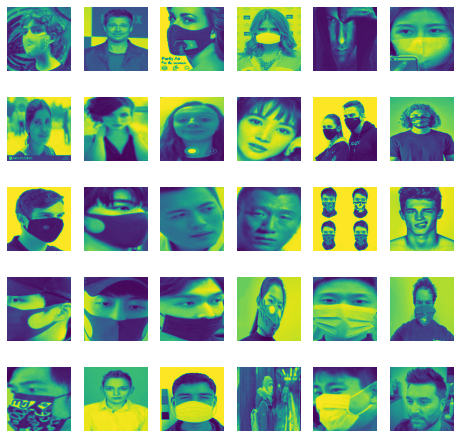

In [72]:
fig = plt.figure(figsize=(8, 8))
columns = 6
rows = 5
for i in range(1, columns*rows +1):
    img = X_train[i]
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
plt.show()

Reshaping the data because it is supposed to be fit into ANN and ANN accepts only 1 dimensional array

In [28]:
X_train.shape

(3776, 128, 128)

In [75]:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

In [76]:
X_train.shape

(3776, 128, 128, 1)

In [77]:
model =Sequential([
    Conv2D(100, (3,3), activation='relu', input_shape=(128, 128, 1)),
    MaxPooling2D(2,2),
    
    Conv2D(100, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    
    Flatten(),
    Dropout(0.5),
    Dense(50, activation='relu'),
    Dense(2, activation='softmax')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [78]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
118/118 [==============================] - 243s 2s/step - loss: 0.7076 - acc: 0.5699
Epoch 2/10
118/118 [==============================] - 241s 2s/step - loss: 0.5565 - acc: 0.7217
Epoch 3/10
118/118 [==============================] - 240s 2s/step - loss: 0.4564 - acc: 0.7878
Epoch 4/10
118/118 [==============================] - 241s 2s/step - loss: 0.3169 - acc: 0.8591
Epoch 5/10
118/118 [==============================] - 241s 2s/step - loss: 0.2404 - acc: 0.9004
Epoch 6/10
118/118 [==============================] - 241s 2s/step - loss: 0.1807 - acc: 0.9335
Epoch 7/10
118/118 [==============================] - 241s 2s/step - loss: 0.1354 - acc: 0.9474
Epoch 8/10
118/118 [==============================] - 242s 2s/step - loss: 0.1056 - acc: 0.9632
Epoch 9/10
118/118 [==============================] - 243s 2s/step - loss: 0.0811 - acc: 0.9687
Epoch 10/10
118/118 [==============================] - 243s 2s/step - loss: 0.0767 - acc: 0.9712


In [93]:
acc      = history.history[     'acc' ]

loss     = history.history[    'loss' ]
epochs   = range(len(acc))

<Figure size 432x288 with 0 Axes>

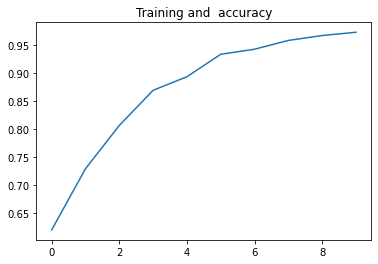

<Figure size 432x432 with 0 Axes>

<Figure size 432x288 with 0 Axes>

In [94]:
plt.plot  ( epochs,     acc )
plt.title ('Training and  accuracy')

plt.figure(figsize=(6,6))
plt.figure()

Text(0.5, 1.0, 'Training and  loss')

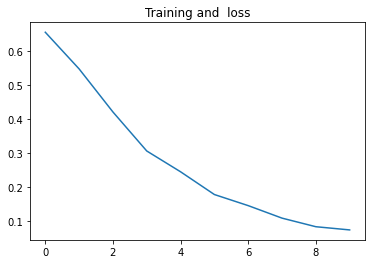

In [95]:
plt.plot  ( epochs,     loss )
plt.title ('Training and  loss'   )

In [104]:
y_te=[]
for i in y_test:
  if i[0]==0. :
    y_te.append(1)
  else:
    y_te.append(0)

In [105]:
y_predict = model.predict(X_test)

In [106]:
predicted_class = [np.argmax(element) for element in y_predict]

In [107]:
accuracy_CNN= accuracy_score(predicted_class,y_te)
accuracy_CNN

0.8602065131056394

In [108]:
listlabels=["Masked","NotMasked"]

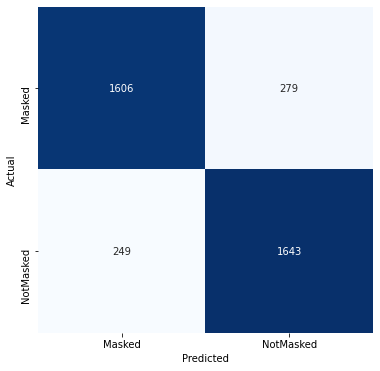

In [110]:
cm = confusion_matrix(y_te,predicted_class)
plt.figure(figsize=(6,6))
sns.heatmap(cm, cbar=False, xticklabels=listlabels, yticklabels=listlabels, fmt='d', annot=True, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [109]:
print(classification_report(y_te,predicted_class))

              precision    recall  f1-score   support

           0       0.87      0.85      0.86      1885
           1       0.85      0.87      0.86      1892

    accuracy                           0.86      3777
   macro avg       0.86      0.86      0.86      3777
weighted avg       0.86      0.86      0.86      3777



In [112]:
acc_list=[51.38,63.65,85.35,76.59,80.75,86.02]
model_list=["SVM_before_LDA","SVM_post_LDA","OVR_SVM","KNN","ANN","CNN"]

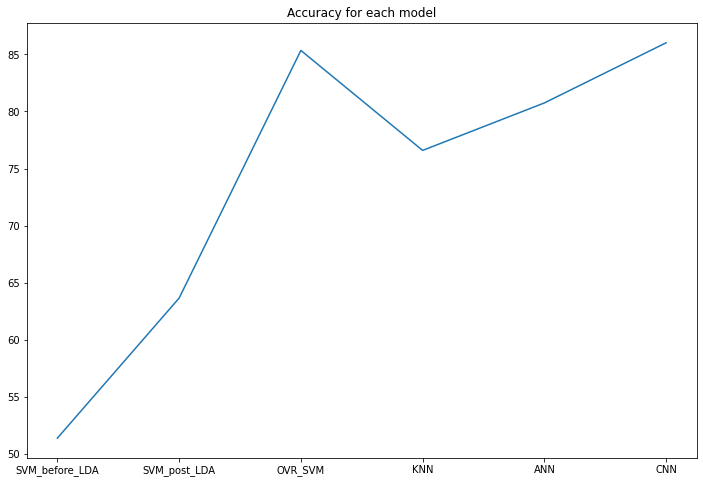

In [114]:
plt.figure(figsize=(12,8))
plt.title('Accuracy for each model')

sns.lineplot(x=model_list, y=acc_list)